### 프로젝트명 : 낚시성 기사 탐지 모델 개발
### 242DBG04_정희수



#### 1. 데이터 수집 및 전처리

1) AI-Hub 에서 "낚시성 기사 탐지" 데이터 다운로드
2) Train 과 Valid 에 해당하는 데이터들 중, 각 산업별로 파일명, 뉴스 기사 본문 (newscontent), 낚시성 여부 (clickbaitClass) columns 을 추출
3) 뉴스 기사 본문 추출 시, 정규화 작업을 통해 특수문자 제거
4) 각 산업별로 낚시성 기사와 비낚시성 기사 통합
5) 최종적으로 모델 학습에 사용할 train 과 valid 데이터로 DB 만들기

In [ ]:
import json
import os
import re

# 경로 설정
base_path = 'C:/Users/sport/OneDrive/바탕 화면/개인프로젝트/가짜뉴스탐지/Train/TL_Part1_Clickbait_Direct_EC'

# 데이터 저장 리스트
D_EC = []

# 디렉토리 내 모든 파일 목록 가져오기
files = os.listdir(base_path)

# 파일 처리 루프
for file_name in files:
    # 파일명 패턴 확인 
    if re.match(r'EC_M0[2-5]_\d{6}_L\.json', file_name):
        file_path = os.path.join(base_path, file_name)

        
        # 파일 읽기 및 데이터 처리
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            
            bait = data.get('labeledDataInfo', {}).get('clickbaitClass')
            content = data.get('sourceDataInfo', {}).get('newsContent')
            
            if bait is not None and content is not None:
                
                content = content.replace('\\"', '"').replace('\n', '')
                
                D_EC.append({
                    'filename': file_name,
                    'newsContent': content,
                    'clickbaitClass': bait
                })


# 파일 총 개수
total_files = len(D_EC)
print(f"Total number of files processed: {total_files}\n")

D_EC = pd.DataFrame(D_EC)
D_EC

Total number of files processed: 7007



,filename,newsContent,clickbaitClass
0,EC_M02_155904_L.json,기관 투자가 스튜어드십 코드 도입 일지 기관 투자가들이 속속 스튜어드십 코드를 도입...,0
1,EC_M02_155905_L.json,공공 구매에 사회 가치가 본격적으로 반영되고 있다.공공 구매 때 사회 가치를 반영하...,0
2,EC_M02_155906_L.json,금융권이 중소·벤처기업 지원에 앞장서고 있다.중소·벤처기업을 도우면 은행의 이미지가...,0
3,EC_M02_155907_L.json,"현대자동차그룹이 최저임금 인상 어려움을 겪는 2·3차 협력사에 1,500억을 지원한...",0
4,EC_M02_155908_L.json,공정거래위원회가 지주회사의 수익구조 파악을 위한 실태조사에 나섰다.공정위는 대기업집...,0
...,...,...,...
7002,EC_M05_164958_L.json,"""월 200대 생산라인인데 7월에 고작 10대 생산했어요"" 국제 원자재 가격 폭등으...",0
7003,EC_M05_164960_L.json,휴가철이다.바닷가에서 놀고는 싶은데 여름의 뜨거운 태양은 피하고 싶다.여행을 갈 때...,0
7004,EC_M05_164961_L.json,"""여름휴가 만이라도 '육퇴'할게요""…호텔도 '돌봄 경쟁'서울 강남구에 사는 정성민씨...",0
7005,EC_M05_164962_L.json,"강석훈 KDB산업은행 회장은 28일 ""(대우조선해양, 아시아나항공 등) 주요 구조조...",0


In [ ]:
C_EC = pd.concat([A_EC,D_EC],ignore_index=True )

output_file = 'Train_clickbait_EC.csv'
C_EC.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")
print(C_EC.shape[0])

Data successfully saved to Train_clickbait_EC.csv
21400


In [ ]:
import json
import os
import re

# 경로 설정
base_path = 'C:/Users/sport/OneDrive/바탕 화면/개인프로젝트/가짜뉴스탐지/Train/TL_Part1_NonClickbait_Auto_EC'

# 데이터 저장 리스트
N_EC = []

# 디렉토리 내 모든 파일 목록 가져오기
files = os.listdir(base_path)

# 파일 처리 루프
for file_name in files:
    # 파일명 패턴 확인 
    if re.match(r'EC_M0[2-5]_\d{6}_L\.json', file_name):
        file_path = os.path.join(base_path, file_name)

        
        # 파일 읽기 및 데이터 처리
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            
            bait = data.get('labeledDataInfo', {}).get('clickbaitClass')
            content = data.get('sourceDataInfo', {}).get('newsContent')
            
            if bait is not None and content is not None:
                
                content = content.replace('\\"', '"').replace('\n', '')
                
                N_EC.append({
                    'filename': file_name,
                    'newsContent': content,
                    'clickbaitClass': bait
                })


# 파일 총 개수
total_files = len(N_EC)
print(f"Total number of files processed: {total_files}\n")

N_EC = pd.DataFrame(N_EC)
N_EC

Total number of files processed: 20664



,filename,newsContent,clickbaitClass
0,EC_M02_222739_L.json,종근당이 지난 10일 새로운 경영을 선언했다고 종근당이 11일 밝혔다.직원들이 행복...,1
1,EC_M02_222740_L.json,최태원(맨 왼쪽) SK그룹 회장과 경영진이 지난 21일 '제1회 이천포럼'에서 석학...,1
2,EC_M02_222741_L.json,금융권이 최근 한국임팩트금융을 설립해 본격 활동을 시작한 데 이어 소외계층 지원에 ...,1
3,EC_M02_222742_L.json,문 정부 출범 이후 재무적 이익과 함께 사회적 가치 창출을 고려하는 사회적 금융이 ...,1
4,EC_M02_222743_L.json,KB국민은행은 금융 기관으로서의 본업에 충실한 사회 공헌 활동을 해왔다.경제 약자 ...,1
...,...,...,...
20659,EC_M05_257136_L.json,쌍용자동차가 노조의 자구안 수용 결정 이후 무급 휴직 시행 방법 등을 놓고 협의에 ...,1
20660,EC_M05_257137_L.json,숙박 플랫폼 여기어때는 맛집 카테고리를 대폭 개편했다고 10일 밝혔다.이번 개편으로...,1
20661,EC_M05_257138_L.json,KB손해보험이 보험사 가운데 데이터 사업에 적극적으로 뛰어들며 선도 이미지를 구축하...,1
20662,EC_M05_257140_L.json,대상라이프사이언스의 ’뉴케어 액티브 골든밸런스’가 지난 5월 기준 누적 판매량 10...,1


In [ ]:
output_file = 'Train_Nonclickbait_EC.csv'
N_EC.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")
print(N_EC.shape[0])

Data successfully saved to Train_Nonclickbait_EC.csv
20664


In [ ]:
train_bait = pd.concat([C_EC,C_GB,C_IS,C_LC,C_PO,C_SO], ignore_index=True)

output_file='Train_clickbait.csv'
train_bait.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")
print(train_bait.shape[0])

Data successfully saved to Train_clickbait.csv
127600


In [ ]:
train_Nonbait = train_Nonbait = pd.concat([N_EC,N_GB,N_IS,N_LC,N_PO,N_SO], ignore_index=True)

output_file='Train_Nonclickbait.csv'
train_Nonbait.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")
print(train_Nonbait.shape[0])

Data successfully saved to Train_Nonclickbait.csv
127845


In [ ]:
valid_bait = pd.concat([C_EC,C_GB,C_IS,C_LC,C_PO,C_SO], ignore_index=True)

output_file='Valid_clickbait.csv'
valid_bait.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")
print(valid_bait.shape[0])

In [ ]:
valid_Nonbait = valid_Nonbait = pd.concat([N_EC,N_GB,N_IS,N_LC,N_PO,N_SO], ignore_index=True)

output_file='Valid_Nonclickbait.csv'
valid_Nonbait.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")
print(valid_Nonbait.shape[0])

In [ ]:
import pandas as pd

train_bait=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_clickbait.csv')
train_Nonbait=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train_Nonclickbait.csv')
train_bait = train_bait[['newsContent', 'clickbaitClass']]
train_Nonbait = train_Nonbait[['newsContent', 'clickbaitClass']]

train = pd.concat([train_bait, train_Nonbait], ignore_index=True)
train

In [ ]:
import pandas as pd

valid_bait = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Valid_clickbait.csv')
valid_Nonbait = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Valid_Nonclickbait.csv')
valid_bait = valid_bait[['newsContent', 'clickbaitClass']]
valid_Nonbait = valid_Nonbait[['newsContent', 'clickbaitClass']]

valid = pd. concat([valid_bait, valid_Nonbait], ignore_index=True)
valid

In [ ]:
train.to_csv('train.csv', index=False)
valid.to_csv('valid.csv', index=False)

#### 2. 데이터 모델 학습

1) 데이터는 총 10만개 사용
2) test : valid = 8 : 2 비율 사용
3) test = 8만개, valid = 2만개 뉴스 기사 사용 (낚시성 기사와 비낚시성 기사는 각각 1:1 비율로 지정)
4) 학습시킬 모델은 총 3개 (Random Forest, LSTM, Logistic Regression)
5) 모델 학습 후 각 모델 별 정확성과 F1 score 출력
6) SNU 팩트첵크 ( 서울대 언론정보연구소) 에 속한 낚시성 뉴스와 비낚시성 뉴스 데이터를 이용해 새로운 데이터에 대한 예측력 검증 진행
7) 각 모델의 정확성, 새로운 데이터에 대한 검증력 등 여러가지 비교 후 최종 모델 선택

##### 1. Random Forest 모델 학습

In [ ]:
# 데이터 로드
import pandas as pd

train = pd.read_csv('C:/Users/sport/OneDrive/바탕 화면/VSC/train.csv')
valid = pd.read_csv('C:/Users/sport/OneDrive/바탕 화면/VSC/valid.csv')

In [ ]:
import pandas as pd

train_clickbait_0 = train[train['clickbaitClass'] == 0].sample(n=40000, random_state=42)
train_clickbait_1 = train[train['clickbaitClass'] == 1].sample(n=40000, random_state=42)
train_sampled = pd.concat([train_clickbait_0, train_clickbait_1], ignore_index=True)

valid_clickbait_0 = valid[valid['clickbaitClass'] == 0].sample(n=10000, random_state=42)
valid_clickbait_1 = valid[valid['clickbaitClass'] == 1].sample(n=10000, random_state=42)
valid_sampled = pd.concat([valid_clickbait_0, valid_clickbait_1], ignore_index=True)

# 데이터 확인
print(train_sampled['clickbaitClass'].value_counts())
print(valid_sampled['clickbaitClass'].value_counts())

clickbaitClass
0    40000
1    40000
Name: count, dtype: int64
clickbaitClass
0    10000
1    10000
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 추출
X_train = train_sampled['newsContent'].tolist()
y_train = train_sampled['clickbaitClass'].tolist()
X_val = valid_sampled['newsContent'].tolist()
y_val = valid_sampled['clickbaitClass'].tolist()

In [ ]:
# TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

In [ ]:
# 랜덤포레스트 모델 생성 및 학습
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# 예측
y_val_pred = rf_model.predict(X_val_tfidf)

# 정확도 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# 분류 보고서
report = classification_report(y_val, y_val_pred)
print('Classification Report:\n', report)


Validation Accuracy: 0.6653
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67     10000
           1       0.67      0.65      0.66     10000

    accuracy                           0.67     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.67      0.67      0.67     20000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_val, y_val_pred)

# 혼동 행렬 출력
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[6845 3155]
 [3539 6461]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 새로운 기사 데이터
new_articles = ["경찰은 불법촬영 신고 건수가 늘어나고 있다면서도 정확한 기준선이 없어 난감하다는 입장이다. 관련 업무를 담당하는 한 경찰 관계자는 의사에 반해 특정 부위 등을 반복해 촬영한 것이면 당연히 불법행위가 되지만 단순히 길거리를 촬영한 영상이면 현장에서 판단이 어려운 것은 사실이라며 사안에 따라 성범죄 전과 등 종합적으로 판단해 수사하고 있다고 설명했다. 법조계는 이같은 영상 촬영이 사전 동의 없이 이뤄지거나 특정 인물을 부각해 반복적으로 찍었다면 불법 소지가 있다고 경고한다. 지난 1월 대법원은 버스에서 레깅스 차림의 여성을 8초가량 촬영한 남성을 일상복을 입었다고 해 성적 욕망의 대상이 아니라고 단정할 수는 없다며 유죄로 판단한 바 있다. 의사에 반해 성적 대상화 우려가 있는 촬영은 불법이라는 의미다. 김기윤 변호사는 특정인물의 얼굴 역시 개인정보에 해당하기 때문에 이를 찍어 공개한 것은 개인정보보호법 위반에 해당할 소지가 있다며 특정 여성의 신체부위가 노출된 영상이라면 얼굴 노출 여부와 촬영 구도 등을 종합적으로 따져 성폭력범죄의 처벌 등에 관한 특례법 위반(카메라 등을 이용한 촬영)이 적용된다고 판단할 수 있다고 지적했다."]

# 새로운 기사 데이터 전처리
new_articles_tfidf = tfidf_vectorizer.transform(new_articles)

# 모델을 사용하여 예측
predictions = rf_model.predict(new_articles_tfidf)

# 예측 결과 확인
for article, prediction in zip(new_articles, predictions):
    print(f"Article: {article}\nPrediction (Clickbait=0, Not Clickbait=1): {prediction}\n")

Article: 경찰은 불법촬영 신고 건수가 늘어나고 있다면서도 정확한 기준선이 없어 난감하다는 입장이다. 관련 업무를 담당하는 한 경찰 관계자는 의사에 반해 특정 부위 등을 반복해 촬영한 것이면 당연히 불법행위가 되지만 단순히 길거리를 촬영한 영상이면 현장에서 판단이 어려운 것은 사실이라며 사안에 따라 성범죄 전과 등 종합적으로 판단해 수사하고 있다고 설명했다. 법조계는 이같은 영상 촬영이 사전 동의 없이 이뤄지거나 특정 인물을 부각해 반복적으로 찍었다면 불법 소지가 있다고 경고한다. 지난 1월 대법원은 버스에서 레깅스 차림의 여성을 8초가량 촬영한 남성을 일상복을 입었다고 해 성적 욕망의 대상이 아니라고 단정할 수는 없다며 유죄로 판단한 바 있다. 의사에 반해 성적 대상화 우려가 있는 촬영은 불법이라는 의미다. 김기윤 변호사는 특정인물의 얼굴 역시 개인정보에 해당하기 때문에 이를 찍어 공개한 것은 개인정보보호법 위반에 해당할 소지가 있다며 특정 여성의 신체부위가 노출된 영상이라면 얼굴 노출 여부와 촬영 구도 등을 종합적으로 따져 성폭력범죄의 처벌 등에 관한 특례법 위반(카메라 등을 이용한 촬영)이 적용된다고 판단할 수 있다고 지적했다.
Prediction (Clickbait=0, Not Clickbait=1): 1



비낚시성 기사를 비낚시성 이라고 올바르게 분류함.

##### 2. LSTM 모델 학습

In [ ]:
# 데이터 로드
import pandas as pd

train = pd.read_csv('C:/Users/sport/OneDrive/바탕 화면/VSC/train.csv')
valid = pd.read_csv('C:/Users/sport/OneDrive/바탕 화면/VSC/valid.csv')

In [ ]:
import pandas as pd

# clickbait=0, clickbait=1 각각 4만개씩 샘플링
train_clickbait_0 = train[train['clickbaitClass'] == 0].sample(n=40000, random_state=42)
train_clickbait_1 = train[train['clickbaitClass'] == 1].sample(n=40000, random_state=42)
train_sampled = pd.concat([train_clickbait_0, train_clickbait_1], ignore_index=True)

# clickbait=0, clickbait=1 각각 1만개씩 샘플링
valid_clickbait_0 = valid[valid['clickbaitClass'] == 0].sample(n=10000, random_state=42)
valid_clickbait_1 = valid[valid['clickbaitClass'] == 1].sample(n=10000, random_state=42)
valid_sampled = pd.concat([valid_clickbait_0, valid_clickbait_1], ignore_index=True)

# 데이터 확인
print(train_sampled['clickbaitClass'].value_counts())
print(valid_sampled['clickbaitClass'].value_counts())

clickbaitClass
0    40000
1    40000
Name: count, dtype: int64
clickbaitClass
0    10000
1    10000
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# 데이터 추출
X_train = train_sampled['newsContent'].tolist()
y_train = train_sampled['clickbaitClass'].tolist()
X_val = valid_sampled['newsContent'].tolist()
y_val = valid_sampled['clickbaitClass'].tolist()

In [ ]:
# 텍스트 토크나이저 설정
tokenizer = Tokenizer(num_words=5000)  # 상위 5000개의 단어만 사용
tokenizer.fit_on_texts(X_train)

In [ ]:
# 텍스트를 시퀀스로 변환
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

In [ ]:
# 시퀀스 길이 찾기
max_len_train = max(len(seq) for seq in X_train_seq)
max_len_val = max(len(seq) for seq in X_val_seq)
max_len = max(max_len_train, max_len_val)

In [ ]:
# 시퀀스 길이를 동일하게 패딩
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

In [ ]:
# 레이블을 numpy 배열로 변환
y_train = np.array(y_train)
y_val = np.array(y_val)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# LSTM 모델 구축
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128 ))
model.add(LSTM(64, return_sequences=True))  
model.add(Dropout(0.4))  # 드롭아웃 확률 증가
model.add(LSTM(32))  
model.add(Dropout(0.4))  # 드롭아웃 확률 증가
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val), callbacks=[early_stopping])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1324s 1s/step - accuracy: 0.5625 - loss: 0.6797 - val_accuracy: 0.6175 - val_loss: 0.6576
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1231s 985ms/step - accuracy: 0.6372 - loss: 0.6418 - val_accuracy: 0.5662 - val_loss: 0.6824
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1351s 1s/step - accuracy: 0.6459 - loss: 0.6292 - val_accuracy: 0.6308 - val_loss: 0.6403
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1332s 1s/step - accuracy: 0.7056 - loss: 0.5750 - val_accuracy: 0.6726 - val_loss: 0.6126
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1843s 1s/step - accuracy: 0.7429 - loss: 0.5276 - val_accuracy: 0.6773 - val_loss: 0.6129
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1486s 1s/step - accuracy: 0.7746 - loss: 0.4850 - val_accuracy: 0.6723 - val_loss: 0.6366


##### 모델 성능 조정
1. LSTM 학습시, LSTM 크기를 (128,64), (64,32), (32,16) 경우로 나누어 학습시켜 봄.
2. 드롭아웃을 0.2 에서 0.3, 0.4 로 증가시켜 봄.
3. early stopping patience 를 3에서 2로 줄여서 학습시켜 봄.

In [ ]:
# 모델 평가
loss, accuracy = model.evaluate(X_val_pad, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 210ms/step - accuracy: 0.6853 - loss: 0.6437
Validation Loss: 0.6126123666763306
Validation Accuracy: 0.6725999712944031


In [ ]:
from sklearn.metrics import classification_report

# 정확도, F1 스코어, 재현율 등의 지표 출력
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_class, target_names=['Non-Clickbait', 'Clickbait']))


Classification Report:
               precision    recall  f1-score   support

Non-Clickbait       0.67      0.69      0.68     10000
    Clickbait       0.68      0.65      0.67     10000

     accuracy                           0.67     20000
    macro avg       0.67      0.67      0.67     20000
 weighted avg       0.67      0.67      0.67     20000



625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 265ms/step


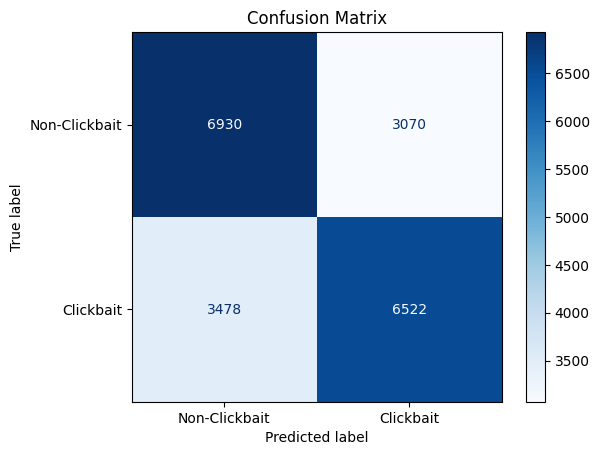

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Validation 데이터에 대한 예측
y_val_pred = model.predict(X_val_pad)
y_val_pred_class = (y_val_pred > 0.5).astype(int).flatten()  # 0.5 이상이면 1, 미만이면 0

# 혼동 행렬 계산
cm = confusion_matrix(y_val, y_val_pred_class)

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Clickbait', 'Clickbait'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 새로운 기사 예측
new_article = ["내년도 최저임금 심의에서 업종별 차등적용 도입 방안이 가시화되고 있다. 최저임금 업종별 차등적용에 대한 정부의 의지가 강한데다, 최근 새롭게 구성된 공익위원들도 보수색이 짙어 지난해와는 전혀 다른 양상이다. 내년에 차등적용이 현실화될 경우 지난 1989년 이후 36년만에 도입된다. 특히 최저임금의 업종별 차등적용은 윤석열 대통령의 대선 공약이다. 지난달 열린 민생토론회에서도 외국인 유학생과 이민자의 가사·육아 취업 필요성을 언급하며, 최저임금 제한 없이 일할 수 있어야 유연한 노동시장이 만들어질 수 있다고 강조했다."]
new_article_seq = tokenizer.texts_to_sequences(new_article)
new_article_pad = pad_sequences(new_article_seq, maxlen=max_len)
prediction = model.predict(new_article_pad)
print(f'Prediction: {prediction[0][0]}')  # 0.5 이상이면 unbait, 이하이면 bait

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Prediction: 0.48035532236099243


가짜 뉴스를 낚시성 기사로 잘 분류함

In [ ]:
# 새로운 기사 예측
new_article = ["경찰은 불법촬영 신고 건수가 늘어나고 있다면서도 정확한 기준선이 없어 난감하다는 입장이다. 관련 업무를 담당하는 한 경찰 관계자는 의사에 반해 특정 부위 등을 반복해 촬영한 것이면 당연히 불법행위가 되지만 단순히 길거리를 촬영한 영상이면 현장에서 판단이 어려운 것은 사실이라며 사안에 따라 성범죄 전과 등 종합적으로 판단해 수사하고 있다고 설명했다. 법조계는 이같은 영상 촬영이 사전 동의 없이 이뤄지거나 특정 인물을 부각해 반복적으로 찍었다면 불법 소지가 있다고 경고한다. 지난 1월 대법원은 버스에서 레깅스 차림의 여성을 8초가량 촬영한 남성을 일상복을 입었다고 해 성적 욕망의 대상이 아니라고 단정할 수는 없다며 유죄로 판단한 바 있다. 의사에 반해 성적 대상화 우려가 있는 촬영은 불법이라는 의미다. 김기윤 변호사는 특정인물의 얼굴 역시 개인정보에 해당하기 때문에 이를 찍어 공개한 것은 개인정보보호법 위반에 해당할 소지가 있다며 특정 여성의 신체부위가 노출된 영상이라면 얼굴 노출 여부와 촬영 구도 등을 종합적으로 따져 성폭력범죄의 처벌 등에 관한 특례법 위반(카메라 등을 이용한 촬영)이 적용된다고 판단할 수 있다고 지적했다. "]
new_article_seq = tokenizer.texts_to_sequences(new_article)
new_article_pad = pad_sequences(new_article_seq, maxlen=max_len)
prediction = model.predict(new_article_pad)
print(f'Prediction: {prediction[0][0]}')  # 0.5 이상이면 unbait, 이하이면 bait

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Prediction: 0.7689980268478394


비낚시성 뉴스를 높은 확률로 사실이라고 분류함

##### 3. Logistic Regression 모델 학습

In [ ]:
# 데이터 로드
import pandas as pd

train = pd.read_csv('C:/Users/sport/OneDrive/바탕 화면/VSC/train.csv')
valid = pd.read_csv('C:/Users/sport/OneDrive/바탕 화면/VSC/valid.csv')

In [ ]:
import pandas as pd

train_clickbait_0 = train[train['clickbaitClass'] == 0].sample(n=40000, random_state=42)
train_clickbait_1 = train[train['clickbaitClass'] == 1].sample(n=40000, random_state=42)
train_sampled = pd.concat([train_clickbait_0, train_clickbait_1], ignore_index=True)

valid_clickbait_0 = valid[valid['clickbaitClass'] == 0].sample(n=10000, random_state=42)
valid_clickbait_1 = valid[valid['clickbaitClass'] == 1].sample(n=10000, random_state=42)
valid_sampled = pd.concat([valid_clickbait_0, valid_clickbait_1], ignore_index=True)

# 데이터 확인
print(train_sampled['clickbaitClass'].value_counts())
print(valid_sampled['clickbaitClass'].value_counts())

clickbaitClass
0    40000
1    40000
Name: count, dtype: int64
clickbaitClass
0    10000
1    10000
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 추출
X_train = train_sampled['newsContent'].tolist()
y_train = train_sampled['clickbaitClass'].tolist()
X_val = valid_sampled['newsContent'].tolist()
y_val = valid_sampled['clickbaitClass'].tolist()

In [ ]:
# TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

# 텍스트 데이터를 TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 학습
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# 검증 데이터에 대한 예측
y_val_pred = lr_model.predict(X_val_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# 혼동 행렬 계산
cm = confusion_matrix(y_val, y_val_pred)
cm

# 혼동 행렬을 비율로 변환
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized

# 정확도, F1 스코어, 재현율 등의 지표 출력
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=['Non-Clickbait', 'Clickbait']))


Classification Report:
               precision    recall  f1-score   support

Non-Clickbait       0.64      0.62      0.63     10000
    Clickbait       0.63      0.66      0.65     10000

     accuracy                           0.64     20000
    macro avg       0.64      0.64      0.64     20000
 weighted avg       0.64      0.64      0.64     20000



In [ ]:
# 새로운 기사 예측 함수
def predict_article_lr(article):
    article_tfidf = vectorizer.transform([article])
    prediction = lr_model.predict(article_tfidf)[0]
    return "bait" if prediction == 0 else "Nonbait"

# 새로운 기사 예측
new_article = "경찰은 불법촬영 신고 건수가 늘어나고 있다면서도 정확한 기준선이 없어 난감하다는 입장이다. 관련 업무를 담당하는 한 경찰 관계자는 의사에 반해 특정 부위 등을 반복해 촬영한 것이면 당연히 불법행위가 되지만 단순히 길거리를 촬영한 영상이면 현장에서 판단이 어려운 것은 사실이라며 사안에 따라 성범죄 전과 등 종합적으로 판단해 수사하고 있다고 설명했다. 법조계는 이같은 영상 촬영이 사전 동의 없이 이뤄지거나 특정 인물을 부각해 반복적으로 찍었다면 불법 소지가 있다고 경고한다. 지난 1월 대법원은 버스에서 레깅스 차림의 여성을 8초가량 촬영한 남성을 일상복을 입었다고 해 성적 욕망의 대상이 아니라고 단정할 수는 없다며 유죄로 판단한 바 있다. 의사에 반해 성적 대상화 우려가 있는 촬영은 불법이라는 의미다. 김기윤 변호사는 특정인물의 얼굴 역시 개인정보에 해당하기 때문에 이를 찍어 공개한 것은 개인정보보호법 위반에 해당할 소지가 있다며 특정 여성의 신체부위가 노출된 영상이라면 얼굴 노출 여부와 촬영 구도 등을 종합적으로 따져 성폭력범죄의 처벌 등에 관한 특례법 위반(카메라 등을 이용한 촬영)이 적용된다고 판단할 수 있다고 지적했다."
prediction = predict_article_lr(new_article)
print(f'Prediction for the new article: {prediction}')

Prediction for the new article: Nonbait


비낚시성 기사를 사실이라고 잘 분류함

#### 3. 최적 모델 선정 : Random Forest

1) Logistic Regression 모델이 나머지 Random Forest 와 LSTM 모델과 비교했을 때 정확성이 조금 떨어짐.
2) Random Forest 와 LSTM 의 정확성이나 F1 score 은 서로 미세하게 차이나지만 거의 비슷하다고 보여짐.
3) 하지만 새로운 데이터를 검증 시, LSTM 으로 학습한 모델은 분류를 제대로 못하는 경우도 발생.
4) 또한, LSTM 으로 학습한 모델은 Valid data 의 loss 값이 너무 큼.
5) 따라서, 위의 여러가지 상황들을 놓고 판단해보았을 때 Random Forest 모델로 학습한 것이 가장 적합하다고 여겨짐.

#### 4. 기대효과

거짓 기사가 난무하는 요즘 시대에 개개인이 어떠한 상황에 대해서 사실과 거짓을 판별할 줄 아는 능력이 있어야 함.

하지만 어릴때부터 이런 인터넷의 시대에서 자라기 때문에 판별 능력이 예전보다 저하될 것으로 전문가들은 내다보고 있음.

또한, 연예인 뿐만 아니라 일반인들도 거짓 기사 때문에 피해를 보고 있음.

따라서, 기사들이 진실인지 거짓인지 판별해주는 (스팸 문자를 판별해서 걸러주는 것과 같은 기능) 모델이 있다면 도움이 될 것으로 예상함. 